# Generación de señales de entrada para testear el filtro PI

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tool._fixedInt import *
from scipy import signal
from scipy.signal import lfilter, firwin
from scipy.fftpack import fft,fftshift
from random import *

/home/kevin/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/home/kevin/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /



Coeficiente Kp: 0.0999755859375
Coeficiente Kp HEXADECIMAL: 0CCC

Coeficiente Ki: 0.04998779296875
Coeficiente Ki HEXADECIMAL: 0666

Coeficiente K: 0.04998779296875
Coeficiente K HEXADECIMAL: F99A


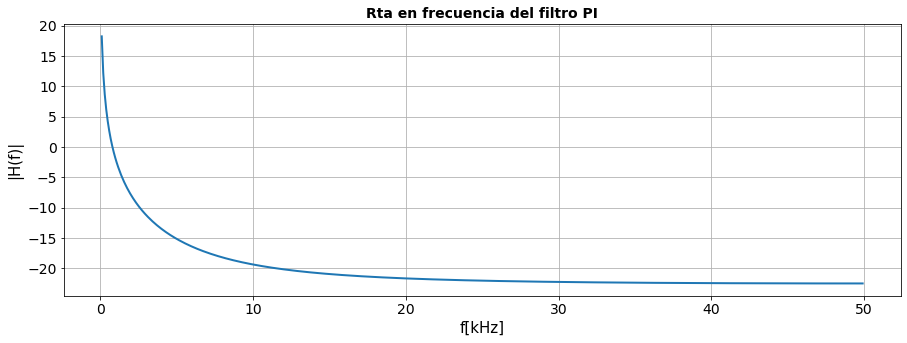

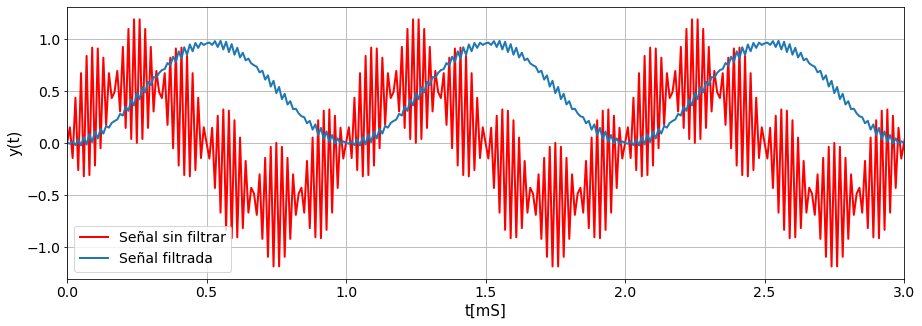

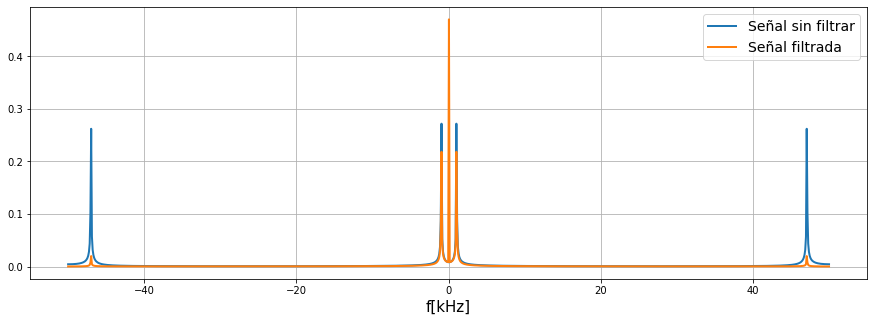

In [3]:


NB_DATA  = 16
NBF_DATA = 15

N    = 1024
NFFT = N
fs   = 100e3
Ts   = 1/fs
t    = np.arange(N)*Ts
f1   = 1e3
f2   = 47e3

Kp_float = 0.1
Kp_fixed = DeFixedInt(NB_DATA, NBF_DATA)
Kp_fixed.value = Kp_float
Kp = Kp_fixed.fValue

Ki_float = 0.05
Ki_fixed = DeFixedInt(NB_DATA, NBF_DATA)
Ki_fixed.value = Ki_float
Ki = Ki_fixed.fValue

K_fixed = DeFixedInt(NB_DATA, NBF_DATA)
K_fixed.value = Ki-Kp
K = K_fixed.fValue

b = [K, Kp]
a = [1.0, -1.0]

w,h = signal.freqz(b=b, a=a)
f_iir = w/np.pi*fs/2
h = 20*np.log10(abs(h))

noisy_signal = 0.6*np.sin(2*np.pi*f1*t) + 0.6*np.sin(2*np.pi*f2*t)
noisy_signal_filtered = lfilter(b,a,noisy_signal)

X          = fft(noisy_signal, NFFT)
X          = fftshift(X)

X_filtered = fft(noisy_signal_filtered, NFFT)
X_filtered = fftshift(X_filtered)

f = np.linspace(-fs/2, fs/2, NFFT)

plt.figure(figsize=(15,5))
plt.plot(f_iir/1e3,h, linewidth=2)
plt.xlabel("f[kHz]", fontsize = 15)
plt.ylabel("|H(f)|", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Rta en frecuencia del filtro PI", fontsize = 14, fontweight = "bold")
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(t/1e-3,noisy_signal, color = "red", linewidth = 2, label = "Señal sin filtrar")
plt.plot(t/1e-3,noisy_signal_filtered, linewidth=2, label = "Señal filtrada")
plt.xlabel("t[mS]", fontsize = 15)
plt.ylabel("y(t)", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = "best", fontsize = 14)
plt.xlim([0.0, 3])
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(f/1e3,1/NFFT*np.abs(X), label = "Señal sin filtrar", linewidth = 2)
plt.plot(f/1e3,1/NFFT*np.abs(X_filtered), label = "Señal filtrada", linewidth = 2)
plt.xlabel("f[kHz]", fontsize = 15)
plt.legend(loc = "best", fontsize = 14)
plt.grid(True)

xn = arrayFixedInt(NB_DATA, NBF_DATA, noisy_signal)
xn_fix = [i.fValue for i in xn]

input_sig = open("input_pi.mem","w")
for i in xn:
    input_sig.write(f"0x{i.__hex__()}\n")
input_sig.close()



print(f"\nCoeficiente Kp: {Kp}")
print(f"Coeficiente Kp HEXADECIMAL: {Kp_fixed.__hex__()}")

print(f"\nCoeficiente Ki: {Ki}")
print(f"Coeficiente Ki HEXADECIMAL: {Ki_fixed.__hex__()}")

print(f"\nCoeficiente K: {Ki}")
print(f"Coeficiente K HEXADECIMAL: {K_fixed.__hex__()}")